In [5]:
import trueskill
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import math
import pickle
with open('ratings.pkl', 'rb') as f:
    ratings = pickle.load(f)

In [3]:
data = pd.read_excel(
        "data.xlsx",
        sheet_name="Data",
        skiprows=[0,1],
        index_col = 1)

In [4]:
data = data.drop(['Grade Level'], axis = 1)

In [5]:
def emit_tuples(df):
    import math
    
    it = df.iterrows()
    
    for student_id, row in enumerate(it):
        for qn_id, cell in enumerate(row[1]):
            if math.isnan(cell):
                continue
            else:
                yield (df.index[student_id], df.columns.values[qn_id], int(cell))

In [6]:
data = list(emit_tuples(data))

In [7]:
def make_match(student, question, result):
    if result == 1:
        return (student, question)
    else:
        return (question, student)

In [8]:
matches = [make_match(student, question, result) for student, question, result in data]

In [9]:
# players is a list of all the unique students and questions
players = set()
players = players.union((match[0] for match in matches)).union((match[1] for match in matches))

In [10]:
# initialise trueskill parameters with the defaults
mu=25.000
sigma=8.333
beta=4.167
tau=0.083
draw_probability=0
trueskill.setup(mu=mu, sigma=sigma, beta=beta, tau=tau, draw_probability=draw_probability, backend=None)

trueskill.TrueSkill(mu=25.000, sigma=8.333, beta=4.167, tau=0.083, draw_probability=0.0%)

In [10]:
i = 1

ratings = {}
simulated_means = {}
simulated_std_devs = {}
    
for player in players:
    ratings[player] = trueskill.Rating()

for player in players:
    simulated_means[player] = []
    
for player in players:
    simulated_std_devs[player] = []

for i in range(100) :
    
    ratings = {}
    
    for player in players:
        ratings[player] = trueskill.Rating()
        
    from random import shuffle
    shuffle(matches)
    
    for winning_player, losing_player in matches:
    
        winner_initial_rating = ratings[winning_player]
        loser_initial_rating = ratings[losing_player]
      
        winner_new_rating, loser_new_rating = trueskill.rate_1vs1(winner_initial_rating, loser_initial_rating)
        
        ratings[winning_player] = winner_new_rating
        ratings[losing_player] = loser_new_rating
        
    for player in ratings:
        simulated_means[player].append(ratings[player].mu)
        
    for player in ratings:
        simulated_std_devs[player].append(ratings[player].sigma)
        
    i = i + 1

<function matplotlib.pyplot.show(*args, **kw)>

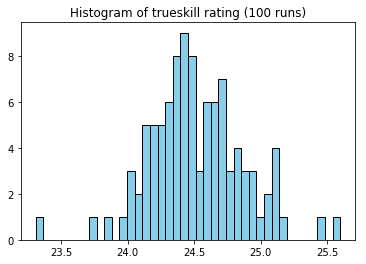

In [11]:
plt.hist(simulated_means['I001'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

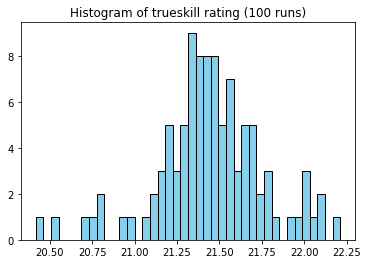

In [12]:
plt.hist(simulated_means['I100'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

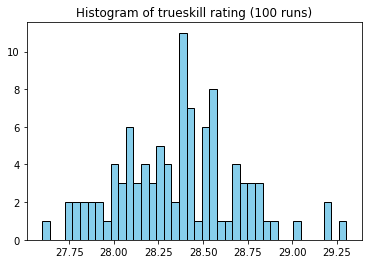

In [13]:
plt.hist(simulated_means['I200'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

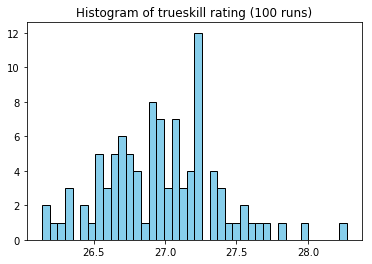

In [14]:
plt.hist(simulated_means['I300'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

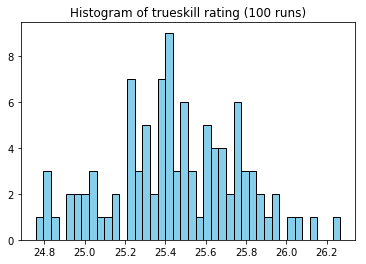

In [15]:
plt.hist(simulated_means['I400'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

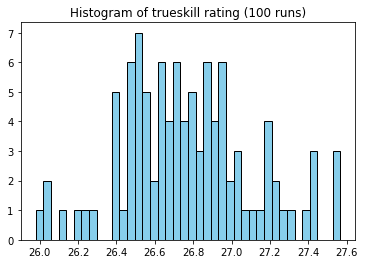

In [16]:
plt.hist(simulated_means['I500'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

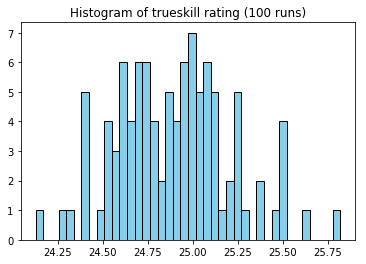

In [17]:
plt.hist(simulated_means['I600'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

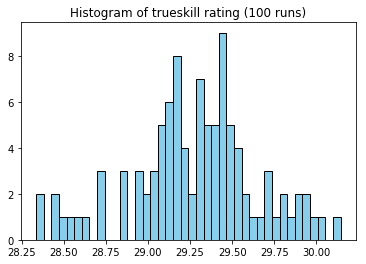

In [18]:
plt.hist(simulated_means['I700'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

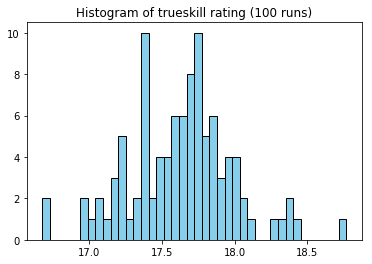

In [70]:
plt.hist(simulated_means['L3A1'], bins = 40, edgecolor = 'black', color = 'skyblue')
plt.title('Histogram of trueskill rating (100 runs)')
plt.show

In [19]:
ratings = {}
ratings_convergence = {}

for player in players:
    ratings[player] = trueskill.Rating()
    
for player in players:
    ratings_convergence[player] = [ratings[player].mu]

for winning_player, losing_player in matches:
    
    winner_initial_rating = ratings[winning_player]
    loser_initial_rating = ratings[losing_player]
      
    winner_new_rating, loser_new_rating = trueskill.rate_1vs1(winner_initial_rating, loser_initial_rating)
        
    ratings[winning_player] = winner_new_rating
    ratings[losing_player] = loser_new_rating
    
    ratings_convergence[winning_player].append(ratings[winning_player].mu)
    ratings_convergence[losing_player].append(ratings[losing_player].mu)

In [3]:
students = pd.read_excel(
                "Data.xlsx",
                sheet_name = "Data",
                skiprows = [0,1],
                usecols = [0,1])

A_students = students[students['Grade Level'] == 'Level_A']['Student ID'].tolist()
B_students = students[students['Grade Level'] == 'Level_B']['Student ID'].tolist()
all_students = students['Student ID'].tolist()

A_students_ratings = []
for student in A_students:
    A_students_ratings.append(ratings[student].mu)
    
B_students_ratings = []
for student in B_students:
    B_students_ratings.append(ratings[student].mu)
    
A_students_sigma = []
for student in A_students:
    A_students_sigma.append(ratings[student].sigma)

B_students_sigma = []
for student in B_students:
    B_students_sigma.append(ratings[student].sigma)

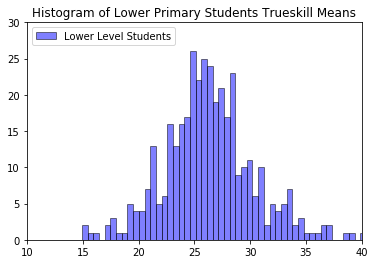

In [21]:
plt.hist(A_students_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Lower Level Students', color = 'blue')
plt.ylim((0,30))
plt.xlim((10,40))
plt.legend(loc='upper left')
plt.title('Histogram of Lower Primary Students Trueskill Means')
plt.show
plt.savefig('graph.png')

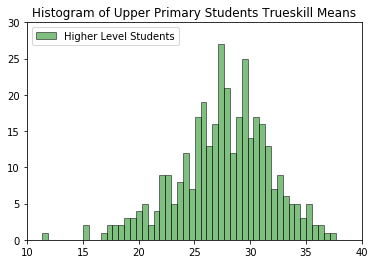

In [22]:
plt.hist(B_students_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Higher Level Students', color = 'green')
plt.ylim((0,30))
plt.xlim((10,40))
plt.legend(loc='upper left')
plt.title('Histogram of Upper Primary Students Trueskill Means')
plt.show
plt.savefig('graph.png')

<function matplotlib.pyplot.show(*args, **kw)>

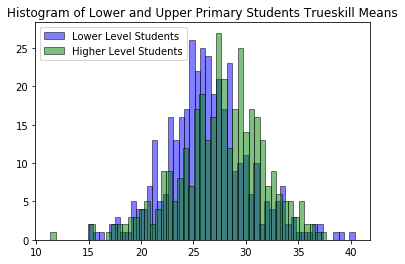

In [72]:
plt.hist(A_students_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Lower Level Students', color = 'blue')
plt.hist(B_students_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Higher Level Students', color = 'green')
plt.legend(loc='upper left')
plt.title('Histogram of Lower and Upper Primary Students Trueskill Means')
plt.show

In [24]:
statistics.mean(A_students_ratings)

26.304863072255504

In [25]:
statistics.mean(B_students_ratings)

27.574025698694207

In [16]:
max(A_students_ratings)

40.39017119619439

In [17]:
max(B_students_ratings)

37.65749139430617

In [5]:
statistics.mean(A_students_sigma)

1.6908228499730733

In [6]:
statistics.mean(B_students_sigma)

1.4675040624050952

In [7]:
min(A_students_sigma)

1.3410817549767673

In [8]:
max(A_students_sigma)

3.099743714023868

In [9]:
min(B_students_sigma)

1.2111023610131997

In [10]:
max(B_students_sigma)

2.35721928399464

In [6]:
questions = pd.read_excel(
                "Data.xlsx",
                sheet_name = "Questions")

A_qns = questions[questions['Question Level'] == 'Lower']['Question Label'].tolist()
B_qns = questions[questions['Question Level'] == 'Upper']['Question Label'].tolist()
all_qns = questions['Question Label'].tolist()

A_qns_ratings = {}
for qn in A_qns:
    A_qns_ratings[qn] = ratings[qn]

B_qns_ratings = {}
for qn in B_qns:
    B_qns_ratings[qn] = ratings[qn]

In [7]:
A_qns_bank_A = questions[(questions['Question Level'] == 'Lower') & (questions['Bank'] == 'A')]['Question Label'].tolist()
A_qns_bank_AB = questions[(questions['Question Level'] == 'Lower') & \
                              ((questions['Bank'] == 'A') | (questions['Bank'] == 'B'))]['Question Label'].tolist()
A_qns_bank_ABC = questions[(questions['Question Level'] == 'Lower') & \
                              ((questions['Bank'] == 'A') | (questions['Bank'] == 'B') | \
                               (questions['Bank'] == 'C'))]['Question Label'].tolist()

all_qns_bank_A = questions[questions['Bank'] == 'A']['Question Label'].tolist()
all_qns_bank_AB = questions[(questions['Bank'] == 'A') | (questions['Bank'] == 'B')]['Question Label'].tolist()
all_qns_bank_ABC = questions[(questions['Bank'] == 'A') | (questions['Bank'] == 'B') | \
                             (questions['Bank'] == 'C')]['Question Label'].tolist()

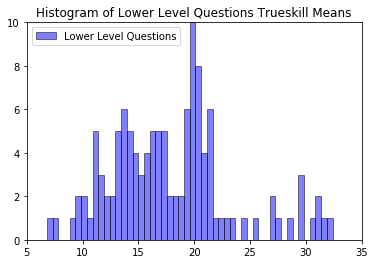

In [23]:
plt.hist(lower_qns_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Lower Level Questions', color = 'blue')
plt.legend(loc='upper left')
plt.ylim((0,10))
plt.xlim((5,35))
plt.title('Histogram of Lower Level Questions Trueskill Means')
plt.show
plt.savefig('graph.png')

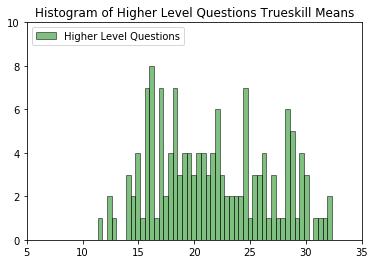

In [24]:
plt.hist(upper_qns_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Higher Level Questions', color = 'green')
plt.legend(loc='upper left')
plt.ylim((0,10))
plt.xlim((5,35))
plt.title('Histogram of Higher Level Questions Trueskill Means')
plt.show
plt.savefig('graph.png')

<function matplotlib.pyplot.show(*args, **kw)>

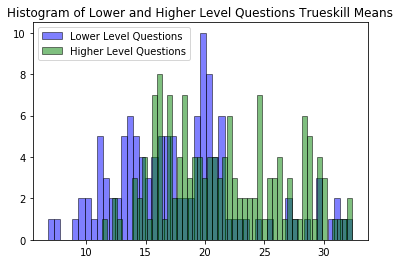

In [77]:
plt.hist(lower_qns_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Lower Level Questions', color = 'blue')
plt.hist(upper_qns_ratings, bins = 50, alpha = 0.5, edgecolor = 'black', label = 'Higher Level Questions', color = 'green')
plt.legend(loc='upper left')
plt.title('Histogram of Lower and Higher Level Questions Trueskill Means')
plt.show

In [40]:
statistics.mean(lower_qns_ratings)

17.895742417480673

In [41]:
statistics.mean(upper_qns_ratings)

21.606567264901244

In [42]:
def plot_convergence(student_ID):
    number_of_matches = list(range(len(ratings_convergence[student_ID])))
    rating = ratings_convergence[student_ID]

    plt.plot(number_of_matches, rating)
    plt.xlabel('no. of matches')
    plt.ylabel('trueskill rating')
    plt.show

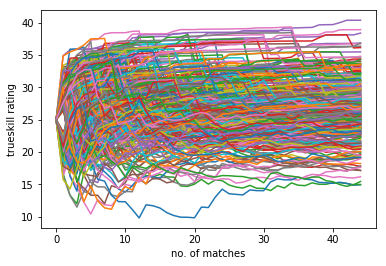

In [43]:
for student in A_students:
    plot_convergence(student)

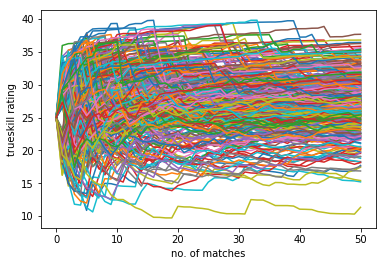

In [44]:
for student in B_students:
    plot_convergence(student)

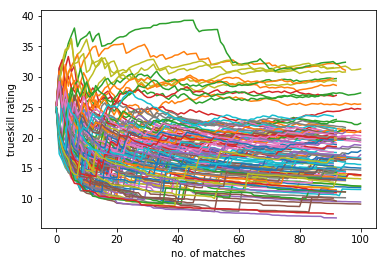

In [45]:
for qn in A_qns:
    plot_convergence(qn)

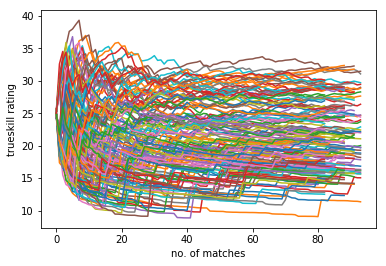

In [46]:
for qn in B_qns:
    plot_convergence(qn)

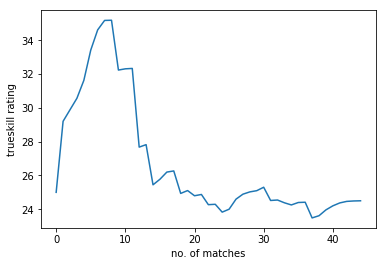

In [47]:
plot_convergence('I001')

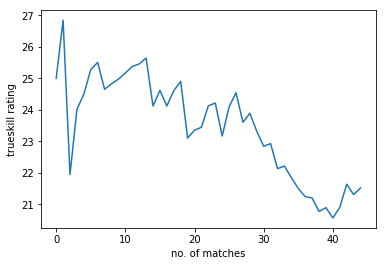

In [48]:
plot_convergence('I100')

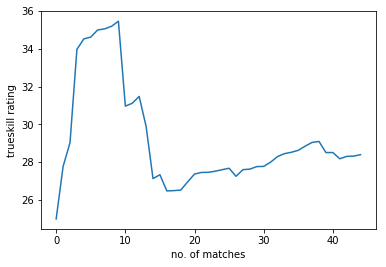

In [49]:
plot_convergence('I200')

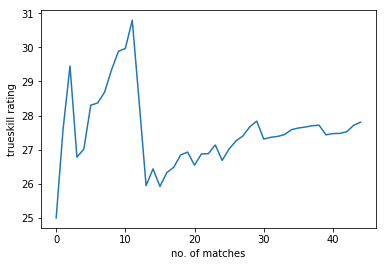

In [50]:
plot_convergence('I300')

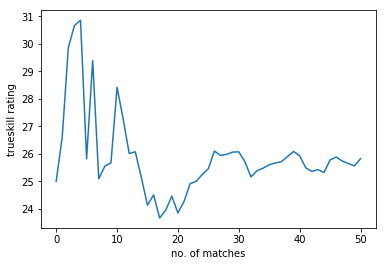

In [51]:
plot_convergence('I400')

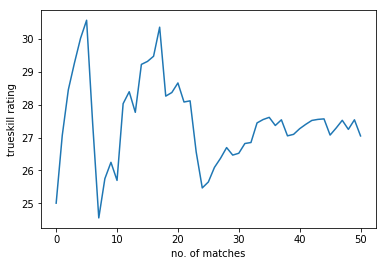

In [52]:
plot_convergence('I500')

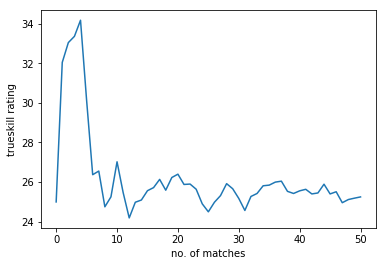

In [53]:
plot_convergence('I600')

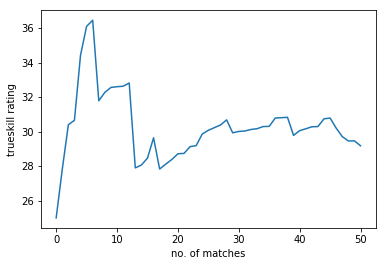

In [54]:
plot_convergence('I700')

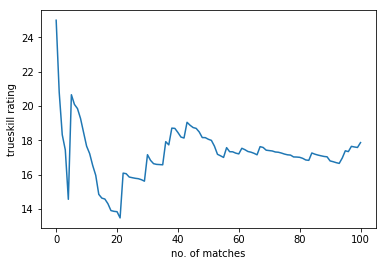

In [55]:
plot_convergence('L3A1')

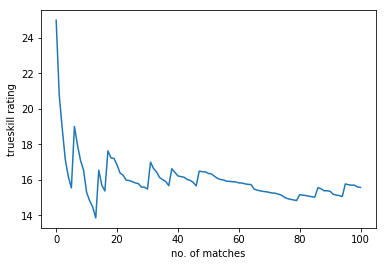

In [56]:
plot_convergence('L3A40')

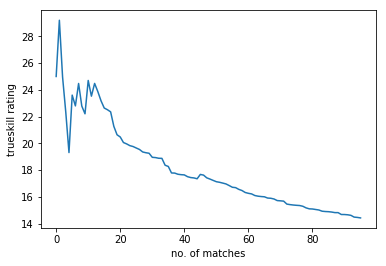

In [57]:
plot_convergence('L3B40')

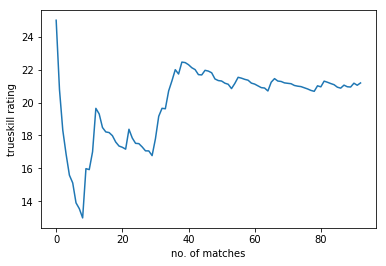

In [58]:
plot_convergence('L3C40')

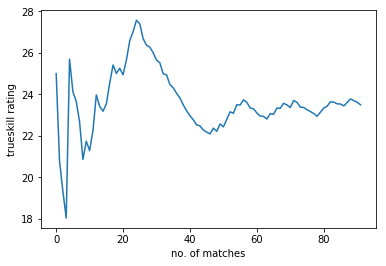

In [59]:
plot_convergence('L3D40')

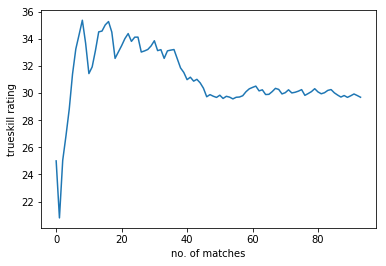

In [60]:
plot_convergence('L5W40')

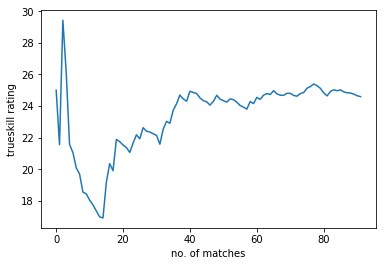

In [61]:
plot_convergence('L5X34')

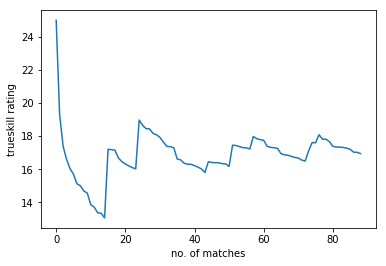

In [62]:
plot_convergence('L5Y24')

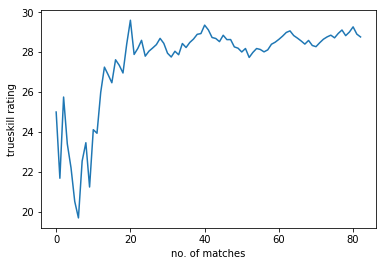

In [63]:
plot_convergence('L5Z18')

In [64]:
squared_diff_simulated_means = {}
std_dev_simulated_means = {}

for player in players:
    squared_diff_simulated_means[player] = []
    
for player in players:
    std_dev_simulated_means[player] = []

for player, vals in simulated_means.items():
    
    for val in vals:
        squared_diff_simulated_means[player].append((val - statistics.mean(vals))**2)
        
    std_dev_simulated_means[player] = math.sqrt(sum(squared_diff_simulated_means[player]) \
                                                /len(squared_diff_simulated_means[player]))

<function matplotlib.pyplot.show(*args, **kw)>

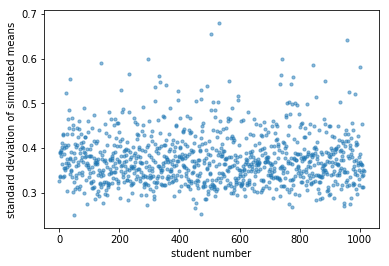

In [66]:
students = list(range(len(std_dev_simulated_means)))
std_devs_means = list(std_dev_simulated_means.values())

plt.scatter(students, std_devs_means, alpha = 0.5, s = 10)
plt.xlabel('student number')
plt.ylabel('standard deviation of simulated means')
plt.show

In [67]:
squared_diff_simulated_std_devs = {}
std_dev_simulated_std_devs = {}

for player in players:
    squared_diff_simulated_std_devs[player] = []
    
for player in players:
    std_dev_simulated_std_devs[player] = []

for player, vals in simulated_std_devs.items():
    
    for val in vals:
        squared_diff_simulated_std_devs[player].append((val - statistics.mean(vals))**2)
        
    std_dev_simulated_std_devs[player] = math.sqrt(sum(squared_diff_simulated_std_devs[player]) \
                                                /len(squared_diff_simulated_std_devs[player]))

<function matplotlib.pyplot.show(*args, **kw)>

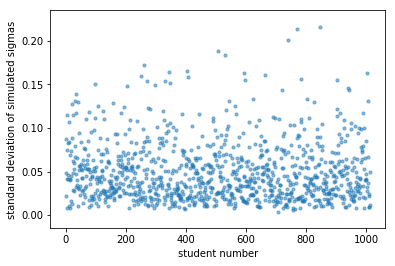

In [68]:
students = list(range(len(std_dev_simulated_std_devs)))
std_devs_sigma = list(std_dev_simulated_std_devs.values())

plt.scatter(students, std_devs_sigma, alpha = 0.5, s = 10)
plt.xlabel('student number')
plt.ylabel('standard deviation of simulated sigmas')
plt.show

In [69]:
import pickle
with open('simulated_means.pkl', 'wb') as f:
    pickle.dump(simulated_means,  f)
with open('simulated_std_devs.pkl', 'wb') as f:
    pickle.dump(simulated_std_devs,  f)
with open('ratings.pkl', 'wb') as f:
    pickle.dump(ratings,  f)
with open('ratings_convergence.pkl', 'wb') as f:
    pickle.dump(ratings_convergence,  f)
with open('players.pkl', 'wb') as f:
    pickle.dump(players,  f)
with open('matches.pkl', 'wb') as f:
    pickle.dump(matches,  f)
with open('A_students.pkl', 'wb') as f:
    pickle.dump(A_students,  f)
with open('B_students.pkl', 'wb') as f:
    pickle.dump(B_students,  f)
with open('all_students.pkl', 'wb') as f:
    pickle.dump(all_students,  f)
with open('all_qns.pkl', 'wb') as f:
    pickle.dump(all_qns,  f)
with open('all_qns_bank_A.pkl', 'wb') as f:
    pickle.dump(all_qns_bank_A,  f)
with open('all_qns_bank_AB.pkl', 'wb') as f:
    pickle.dump(all_qns_bank_AB,  f)
with open('all_qns_bank_ABC.pkl', 'wb') as f:
    pickle.dump(all_qns_bank_ABC,  f)
with open('A_qns_bank_A.pkl', 'wb') as f:
    pickle.dump(A_qns_bank_A,  f)
with open('A_qns_bank_AB.pkl', 'wb') as f:
    pickle.dump(A_qns_bank_AB,  f)
with open('A_qns_bank_ABC.pkl', 'wb') as f:
    pickle.dump(A_qns_bank_ABC,  f)
with open('A_qns.pkl', 'wb') as f:
    pickle.dump(A_qns,  f)
with open('A_qns_ratings.pkl', 'wb') as f:
    pickle.dump(A_qns_ratings,  f)
with open('B_qns.pkl', 'wb') as f:
    pickle.dump(B_qns,  f)
with open('B_qns_ratings.pkl', 'wb') as f:
    pickle.dump(B_qns_ratings,  f)

In [5]:
import operator
sorted(A_qns_ratings.items(), key = operator.itemgetter(1))

[('L3C21', trueskill.Rating(mu=6.790, sigma=2.526)),
 ('L3D20', trueskill.Rating(mu=7.458, sigma=2.693)),
 ('L3A22', trueskill.Rating(mu=9.066, sigma=2.220)),
 ('L3A21', trueskill.Rating(mu=9.419, sigma=1.925)),
 ('L3C22', trueskill.Rating(mu=9.564, sigma=2.275)),
 ('L3D22', trueskill.Rating(mu=10.038, sigma=2.284)),
 ('L3B11', trueskill.Rating(mu=10.103, sigma=2.149)),
 ('L3D21', trueskill.Rating(mu=10.864, sigma=1.959)),
 ('L3C20', trueskill.Rating(mu=10.940, sigma=1.805)),
 ('L3D19', trueskill.Rating(mu=10.981, sigma=2.240)),
 ('L3B22', trueskill.Rating(mu=11.066, sigma=2.081)),
 ('L3B19', trueskill.Rating(mu=11.068, sigma=2.005)),
 ('L3C16', trueskill.Rating(mu=11.197, sigma=1.889)),
 ('L3C2', trueskill.Rating(mu=11.413, sigma=1.822)),
 ('L3A29', trueskill.Rating(mu=11.466, sigma=1.687)),
 ('L3A16', trueskill.Rating(mu=11.768, sigma=1.742)),
 ('L3A12', trueskill.Rating(mu=11.958, sigma=1.713)),
 ('L3A19', trueskill.Rating(mu=12.028, sigma=1.668)),
 ('L3D12', trueskill.Rating(mu=12.

In [5]:
import pandas as pd

df = pd.DataFrame(data = B_students_ratings, index = [0])
df = (df.T)
print(df)
df.to_excel('B_students_ratings.xlsx')

                                             0
I379  trueskill.Rating(mu=26.751, sigma=1.393)
I380  trueskill.Rating(mu=29.595, sigma=1.449)
I381  trueskill.Rating(mu=25.939, sigma=1.317)
I382  trueskill.Rating(mu=35.842, sigma=2.058)
I383  trueskill.Rating(mu=28.031, sigma=1.382)
I384  trueskill.Rating(mu=27.032, sigma=1.372)
I385  trueskill.Rating(mu=32.918, sigma=1.775)
I386  trueskill.Rating(mu=23.933, sigma=1.327)
I387  trueskill.Rating(mu=30.962, sigma=1.570)
I388  trueskill.Rating(mu=24.452, sigma=1.275)
I389  trueskill.Rating(mu=29.308, sigma=1.529)
I390  trueskill.Rating(mu=26.893, sigma=1.339)
I391  trueskill.Rating(mu=32.727, sigma=1.699)
I392  trueskill.Rating(mu=24.284, sigma=1.307)
I393  trueskill.Rating(mu=28.849, sigma=1.456)
I394  trueskill.Rating(mu=31.810, sigma=1.582)
I395  trueskill.Rating(mu=27.872, sigma=1.369)
I396  trueskill.Rating(mu=27.344, sigma=1.373)
I397  trueskill.Rating(mu=27.518, sigma=1.343)
I398  trueskill.Rating(mu=30.033, sigma=1.637)
I399  trueski